## Word (dictionary) Import and Formatting

In [1]:
!pip install deep-translator
from deep_translator import GoogleTranslator
from tqdm.notebook import tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import re

data = []
with open('Dongxian_Dictionary11.txt', 'r', encoding='gbk') as f: # The file is located in `src/data` in the GitHub repository.
    lines = f.readlines()
# The txt above is The Dongxiang language Chinese Dictionary, compiled by Ma Guozhong and Chen Yuanlong, and published in 2001 (ISBN: 9787542107671).
for line in lines:
    if not line:
        continue
    first_bracket_index = line.find('【')
    if first_bracket_index == -1:
        continue
    word = line[:first_bracket_index].strip()
    rest = line[first_bracket_index:]
    brackets = re.findall(r'【(.*?)】', rest)
    if len(brackets) >= 1:
        pos = brackets[0]
        if len(brackets) >= 2:
            source = ', '.join(brackets[1:])
        else:
            source = "东乡"
    else:
      print(f"wrong {line.strip()}")
      continue
    explanation = re.sub(r'【.*?】', '', rest).strip()
    data.append([word, pos, source, explanation])
df = pd.DataFrame(data, columns=["Dongxiang", "POS", "ORIGIN", "Chinese"])
display(df)

,Dongxiang,POS,ORIGIN,Chinese
0,a,动,东乡,买，取，拿，带来，做完，弄完，完成，结束
1,a,名,东乡,大便，脏物，令人恶心的东西
2,a,动,东乡,拉屎
3,a,叹,东乡,表示答应，表示疑问或反问
4,aede,叹,东乡,无奈而答应的声音，表示反感
...,...,...,...,...
12277,zuru zuru gie,动,东乡,义同zurulie
12278,zurulie,动,东乡,细声细气，小声嘟囔或哭闹
12279,zuzhila,动,汉,整人，治人，给人穿小鞋
12280,zuzu,动,汉,小卒，小职员


So far, the Dongxiang language only has a compiled Dongxiang-Chinese dictionary.(ISBN: 9787542107671)

In [10]:
pos_map = {
    '名': 'Noun',
    '动': 'Verb',
    '形': 'Adjective',
    '副': 'Adverb',
    '拟': 'Onomatopoeia',
    '代': 'Pronoun',
    '数': 'Numeral',
    '叹': 'Interjection',
    '后': 'Postposition',
    '连': 'Conjunction',
    '语': 'Modal particle',
    '量': 'Measure word'
}
origin_map = {
    '东乡': 'Dongxiang',
    '汉': 'Chinese',
    '阿': 'Arabic',
    '波': 'Persian',
    '突': 'Turkic',
    '藏': 'Tibetan',
    '阿, 汉': 'Arabic, Chinese',
    '汉, 突': 'Chinese, Turkic',
    '突, 汉': 'Turkic, Chinese',
    '波, 汉': 'Persian, Chinese',
    '波, 突': 'Persian, Turkic',
    '汉, 阿': 'Chinese, Arabic',
    '汉, 波': 'Chinese, Persian',
    '阿, 波': 'Arabic, Persian'
}

df['POS'] = df['POS'].map(pos_map)
df['ORIGIN'] = df['ORIGIN'].map(origin_map)
#comma means that the word has two orgin

In [4]:
pattern = r'(?:义同|同)([a-zA-Z\s]+)'
rows = list()
for i, row in df.iterrows():
    chinese_def = row['Chinese']
    match = re.search(pattern, chinese_def)
    if match:
        target_word = match.group(1).strip()
        matched_row = df[df['Dongxiang'].apply(lambda x: x.strip() == target_word)]
        if len(matched_row) == 0:
            print(f"cannot find citation：'{target_word}  original Dongxiang:{row['Dongxiang']}")
            rows.append(i)

df.drop(rows,inplace = True)

cannot find citation：'puchu  original Dongxiang:buchu
cannot find citation：'puchulie  original Dongxiang:buchulie
cannot find citation：'hhangvagun  original Dongxiang:jigudu
cannot find citation：'cibie gie  original Dongxiang:sibie gie
cannot find citation：'tosunda  original Dongxiang:tosuntu


We manually reviewed these five words and found that they were invalid references, as no corresponding entries exist in the dictionary.

## Synonym processing

In [13]:
df_synonym = []
df_cleaned = []

pattern = r'(?:义同|同)([a-zA-Z\s]+)'

for _, row in df.iterrows():
    chinese_def = row['Chinese']
    match = re.search(pattern, chinese_def)

    if match:
        df_synonym.append(row)
    else:
        df_cleaned.append(row)

df_synonym = pd.DataFrame(df_synonym)
df_cleaned = pd.DataFrame(df_cleaned)


Due to the limited size of the Dongxiang language corpus, we remove synonym entries from the main dictionary and store them in a separate file. This is done to ensure clear and unambiguous definitions, aiming to achieve a one-to-one mapping between words to improve accuracy.





In [19]:
df_synonym.to_csv('df_synonym.csv', sep=',', index=False)
df_cleaned.to_csv('df_cleaned.csv', sep=',', index=False)

## Part of Speech and Word Origin Analysis

In [15]:
df2 = pd.read_csv('df_cleaned.csv')
display(df2)

,Dongxiang,POS,ORIGIN,Chinese
0,a,Verb,Dongxiang,买，取，拿，带来，做完，弄完，完成，结束
1,a,Noun,Dongxiang,大便，脏物，令人恶心的东西
2,a,Verb,Dongxiang,拉屎
3,a,Interjection,Dongxiang,表示答应，表示疑问或反问
4,aede,Interjection,Dongxiang,无奈而答应的声音，表示反感
...,...,...,...,...
11246,zunzuntu,Adjective,Dongxiang,(衣服等)上面有污斑、脏痕的
11247,zuru zuru,Onomatopoeia,Dongxiang,细声细气，小声嘟囔声或哭闹声
11248,zurulie,Verb,Dongxiang,细声细气，小声嘟囔或哭闹
11249,zuzhila,Verb,Chinese,整人，治人，给人穿小鞋


In [16]:
pos_counts = df2['POS'].value_counts()

print("COUNT(in Chinese)：")
print(pos_counts)

pos_counts = df2['ORIGIN'].value_counts()

print("COUNT(in Chinese)：")
print(pos_counts)

COUNT(in Chinese)：
POS
Noun              4624
Verb              4450
Adjective         1286
Adverb             309
Onomatopoeia       228
Pronoun            165
Numeral            109
Interjection        43
Conjunction         15
Postposition        14
Modal particle       4
Measure word         4
Name: count, dtype: int64
COUNT(in Chinese)：
ORIGIN
Dongxiang           6864
Chinese             3806
Arabic               352
Persian               89
Turkic                78
Arabic, Chinese       22
Tibetan               13
Chinese, Turkic        9
Turkic, Chinese        5
Persian, Turkic        4
Chinese, Arabic        4
Persian, Chinese       3
Chinese, Persian       1
Arabic, Persian        1
Name: count, dtype: int64


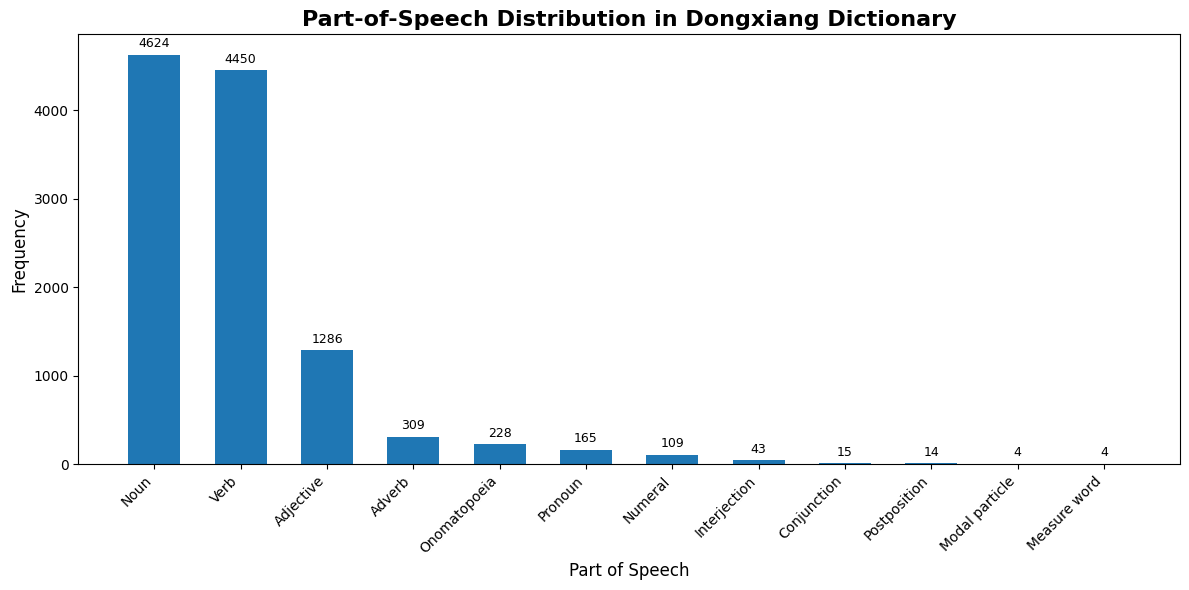

In [17]:
import matplotlib.pyplot as plt

pos_counts = df2['POS'].value_counts()
pos_tuples = list(pos_counts.items())
labels = [pos for pos, count in pos_tuples]
counts = [count for pos, count in pos_tuples]

plt.figure(figsize=(12, 6))
bars = plt.bar(labels, counts, width=0.6)

plt.title("Part-of-Speech Distribution in Dongxiang Dictionary", fontsize=16, weight='bold')
plt.xlabel("Part of Speech", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, str(yval),
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


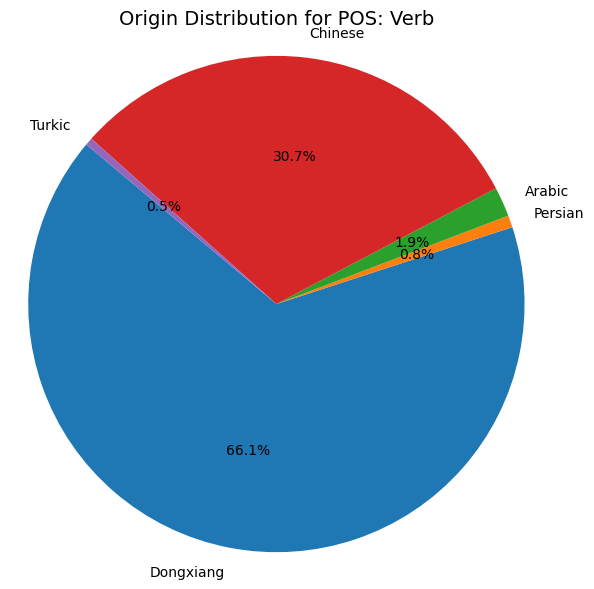

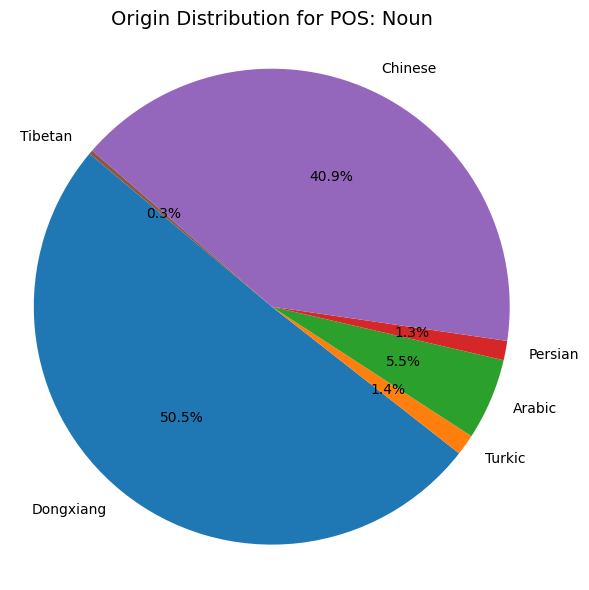

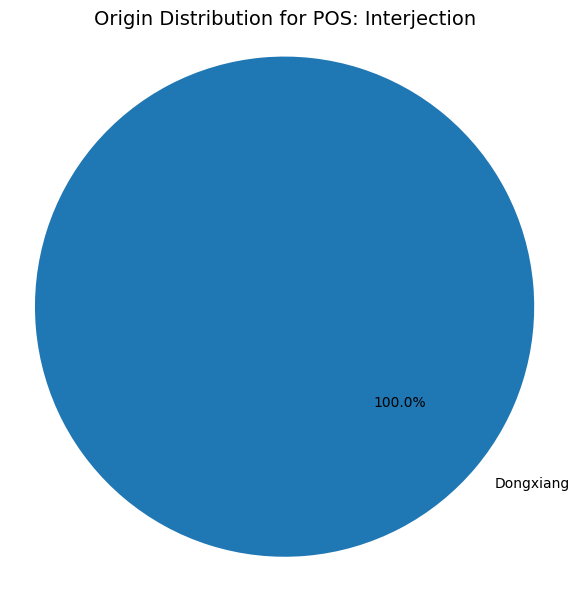

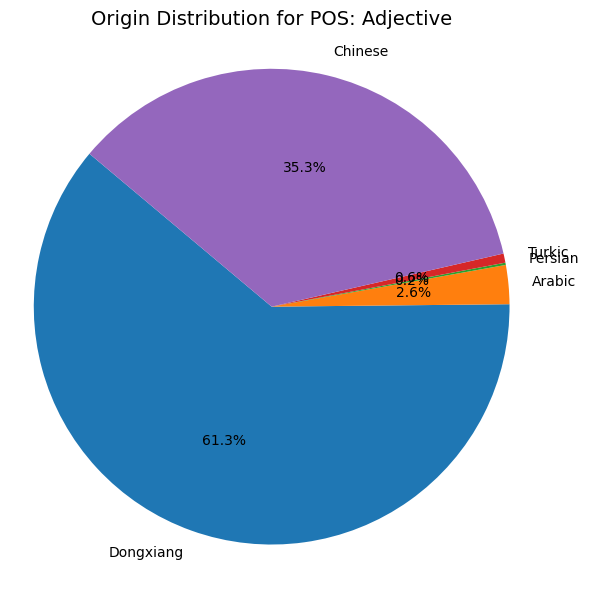

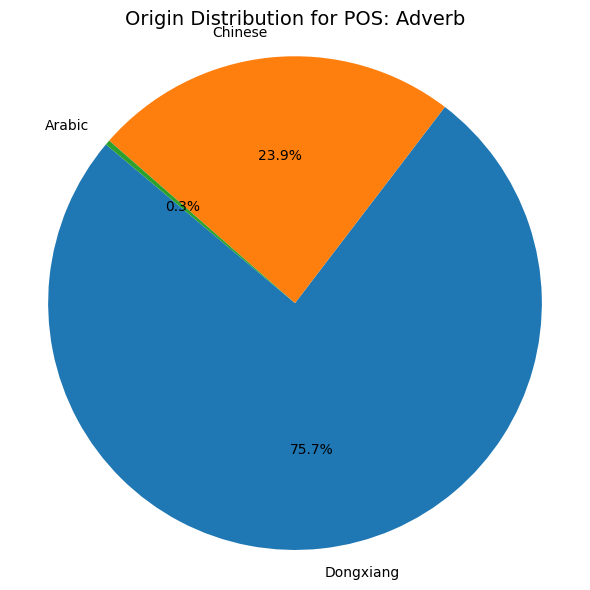

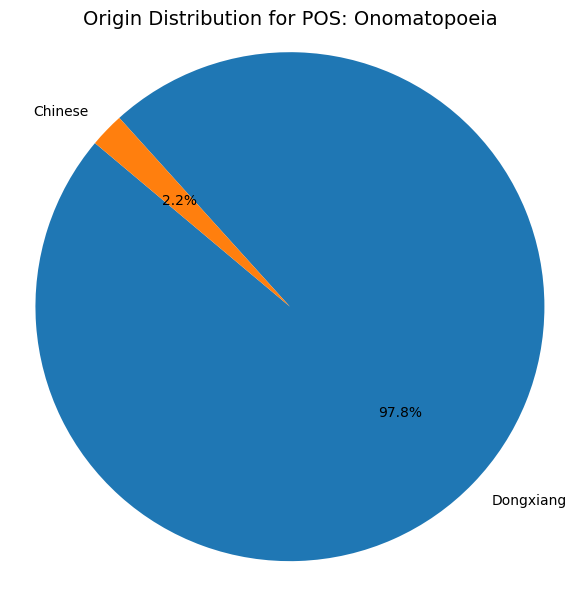

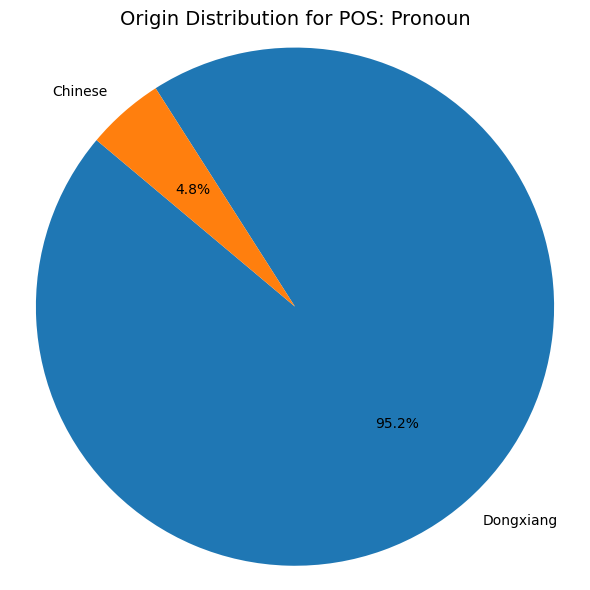

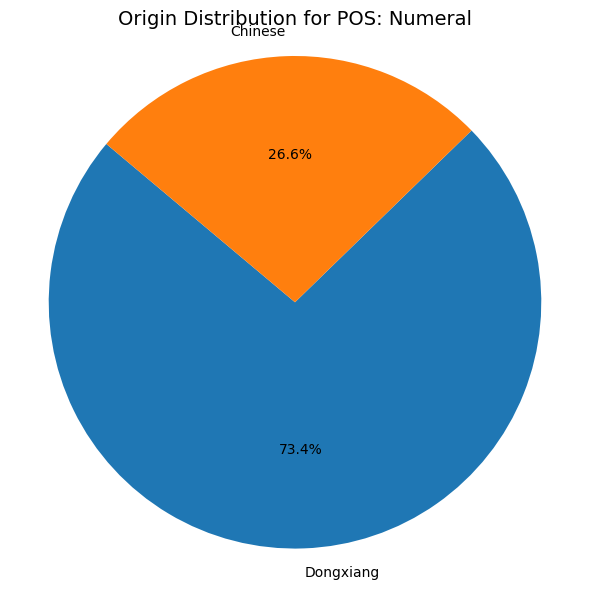

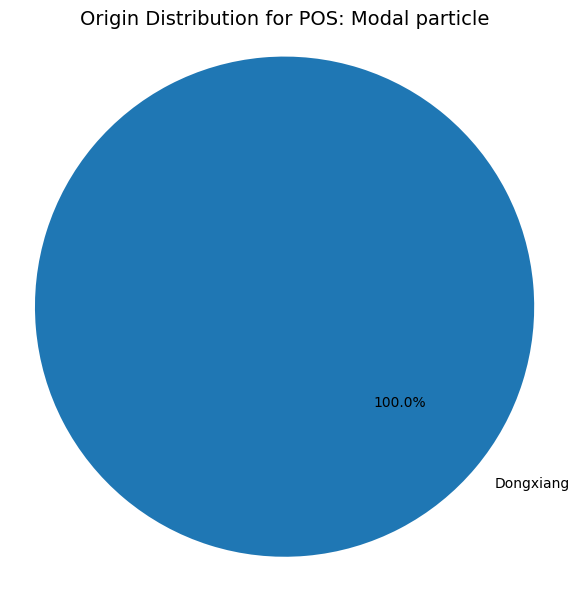

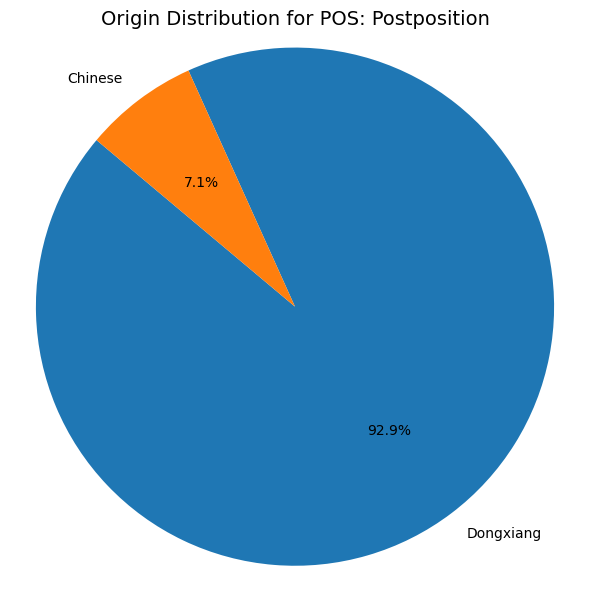

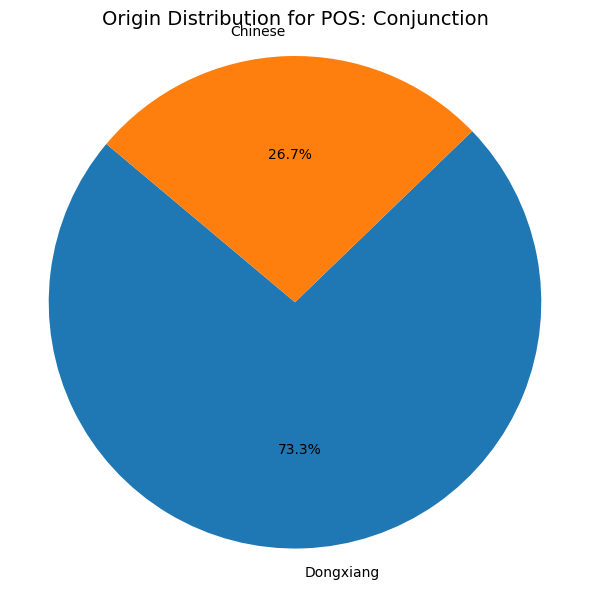

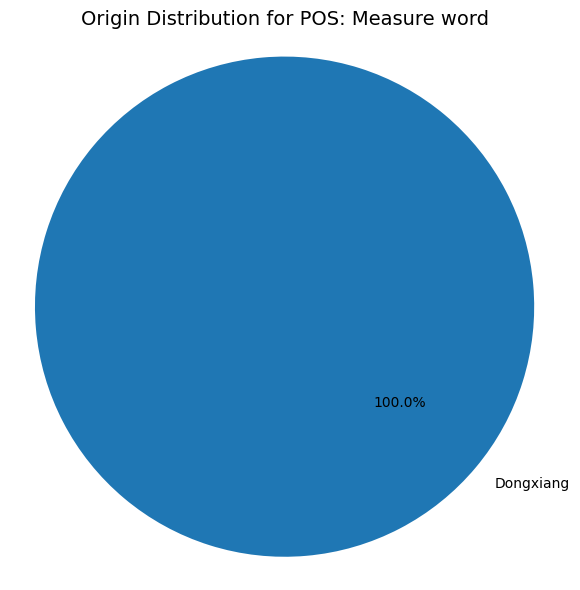

In [18]:
from collections import Counter
df2['ORIGIN_LIST'] = df2['ORIGIN'].str.split(',')
pos_origin_counter = {}

for _, row in df2.iterrows():
    pos = row['POS'].strip()
    origins = [o.strip() for o in row['ORIGIN_LIST']]
    if pos not in pos_origin_counter:
        pos_origin_counter[pos] = Counter()
    for origin in origins:
        pos_origin_counter[pos][origin] += 1

for pos, origin_counter in pos_origin_counter.items():
    labels = list(origin_counter.keys())
    sizes = list(origin_counter.values())

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Origin Distribution for POS: {pos}', fontsize=14)
    plt.axis('equal')
    plt.tight_layout()

## Polysemy Analysis

In [20]:
import pandas as pd
df2 = pd.read_csv('df_cleaned.csv')
display(df2)

,Dongxiang,POS,ORIGIN,Chinese
0,a,Verb,Dongxiang,买，取，拿，带来，做完，弄完，完成，结束
1,a,Noun,Dongxiang,大便，脏物，令人恶心的东西
2,a,Verb,Dongxiang,拉屎
3,a,Interjection,Dongxiang,表示答应，表示疑问或反问
4,aede,Interjection,Dongxiang,无奈而答应的声音，表示反感
...,...,...,...,...
11246,zunzuntu,Adjective,Dongxiang,(衣服等)上面有污斑、脏痕的
11247,zuru zuru,Onomatopoeia,Dongxiang,细声细气，小声嘟囔声或哭闹声
11248,zurulie,Verb,Dongxiang,细声细气，小声嘟囔或哭闹
11249,zuzhila,Verb,Chinese,整人，治人，给人穿小鞋


In [21]:
polywords = (
    df2.groupby('Dongxiang')
    .filter(lambda x: len(x) > 1)['Dongxiang']
    .unique()
    .tolist()
)


In [22]:
len(polywords)

1389

In [24]:
from sentence_transformers import SentenceTransformer, util
from scipy.stats import ttest_ind
import numpy as np

model = SentenceTransformer('distiluse-base-multilingual-cased-v1')
zh_emb = model.encode(df2['Chinese'].tolist(), convert_to_tensor=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [25]:
poly_embeddings = {}

for word in polywords:
    indices = df2[df2['Dongxiang'] == word].index
    embeddings = zh_emb[indices]
    poly_embeddings[word] = embeddings

In [26]:
import matplotlib.pyplot as plt
pairwise_sims = list()

def compute_pairwise_sims(embeddings):
    n = len(embeddings)
    sims = list()
    for i in range(n):
        for j in range(i+1, n):
            sim = util.cos_sim(embeddings[i], embeddings[j]).item()
            sims.append(sim)
    return sims

for word, embs in poly_embeddings.items():
  sims = compute_pairwise_sims(embs)
  pairwise_sims.extend(sims)


Mean: 0.3706
Sd: 0.1991


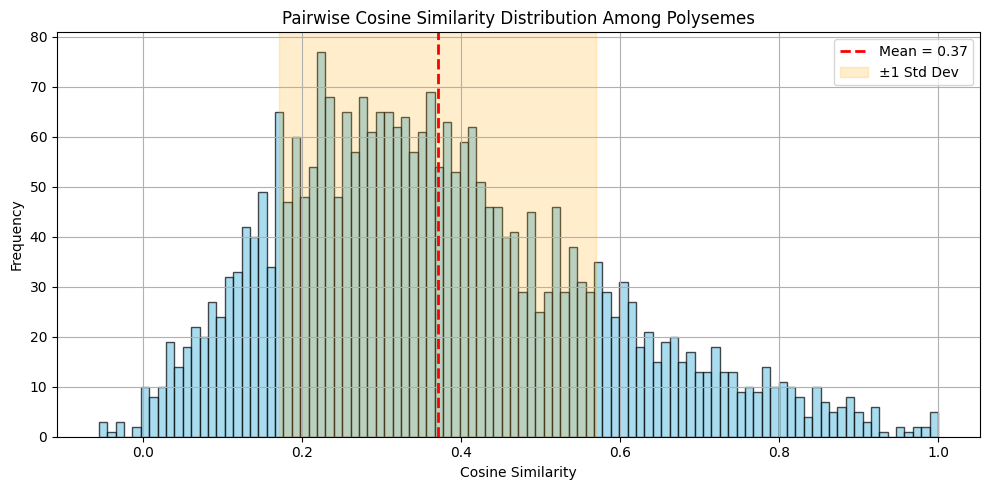

In [27]:
mean_sim = np.mean(pairwise_sims)
std_sim = np.std(pairwise_sims)

print(f"Mean: {mean_sim:.4f}")
print(f"Sd: {std_sim:.4f}")

plt.figure(figsize=(10, 5))
plt.hist(pairwise_sims, bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_sim, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_sim:.2f}')
plt.axvspan(mean_sim - std_sim, mean_sim + std_sim, color='orange', alpha=0.2, label='±1 Std Dev')

plt.title('Pairwise Cosine Similarity Distribution Among Polysemes')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This indicates that most polysemic words have significant semantic differences.

In [28]:
df_poly = df2[df2['Dongxiang'].isin(polywords)]

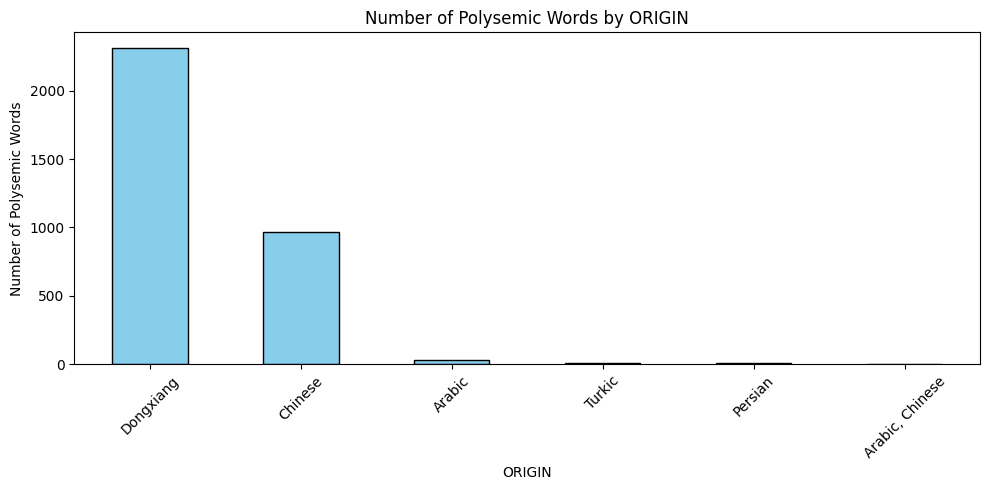

In [29]:
import matplotlib.pyplot as plt

origin_counts = df_poly['ORIGIN'].value_counts()

plt.figure(figsize=(10, 5))
origin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Polysemic Words by ORIGIN')
plt.xlabel('ORIGIN')
plt.ylabel('Number of Polysemic Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
display(origin_counts)

,count
ORIGIN,
Dongxiang,2311
Chinese,968
Arabic,31
Turkic,11
Persian,10
"Arabic, Chinese",1


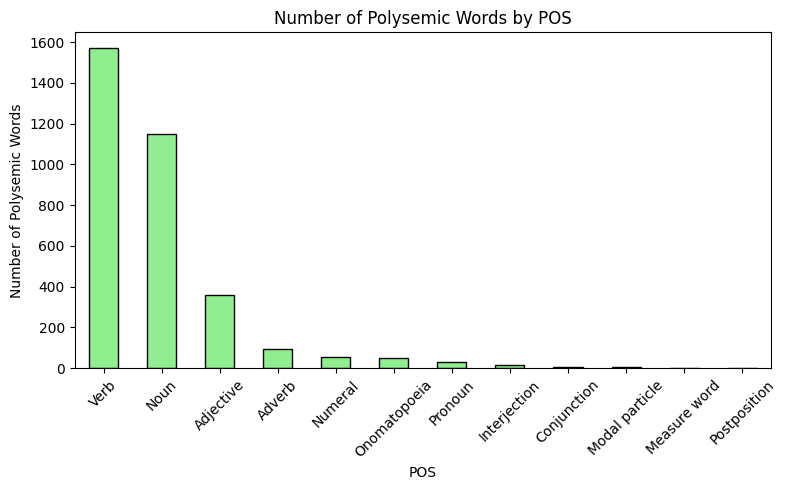

In [31]:
pos_counts = df_poly['POS'].value_counts()

plt.figure(figsize=(8, 5))
pos_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Polysemic Words by POS')
plt.xlabel('POS')
plt.ylabel('Number of Polysemic Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
display(pos_counts)

,count
POS,
Verb,1569
Noun,1147
Adjective,358
Adverb,93
Numeral,55
Onomatopoeia,51
Pronoun,29
Interjection,14
Conjunction,8


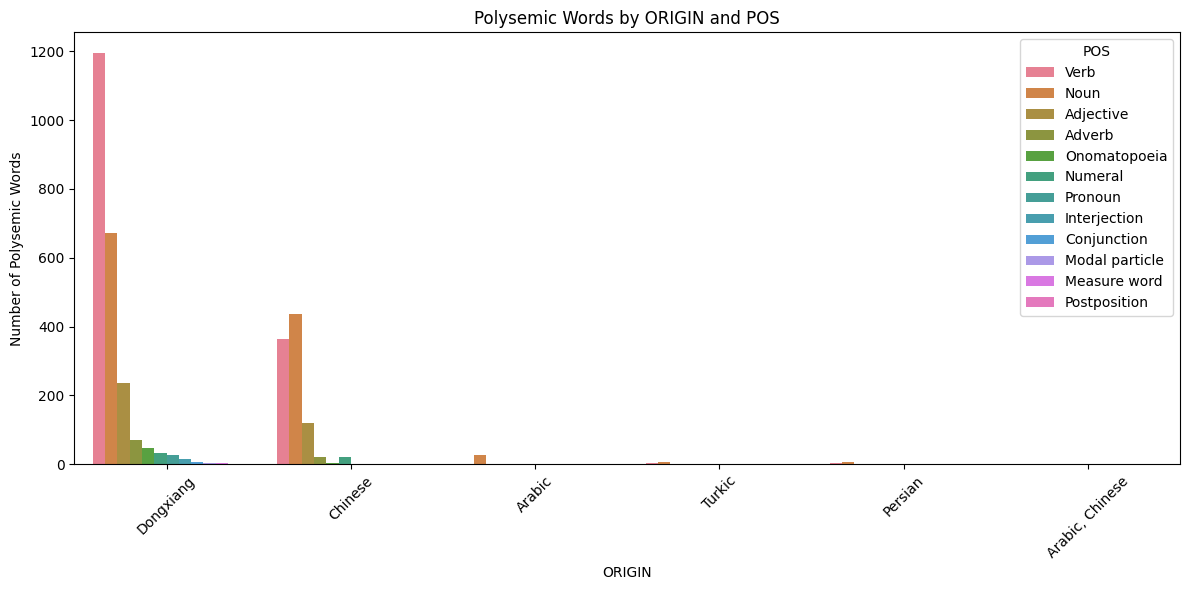

In [32]:
import seaborn as sns
combo_counts = df_poly.groupby(['ORIGIN', 'POS']).size().sort_values(ascending=False)
combo_df = combo_counts.reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=combo_df, x='ORIGIN', y='Count', hue='POS')
plt.title('Polysemic Words by ORIGIN and POS')
plt.xlabel('ORIGIN')
plt.ylabel('Number of Polysemic Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
display(combo_df)

,ORIGIN,POS,Count
0,Dongxiang,Verb,1195
1,Dongxiang,Noun,672
2,Chinese,Noun,436
3,Chinese,Verb,363
4,Dongxiang,Adjective,237
5,Chinese,Adjective,119
6,Dongxiang,Adverb,70
7,Dongxiang,Onomatopoeia,47
8,Dongxiang,Numeral,34
9,Dongxiang,Pronoun,28


A pivotal discovery in our analysis is that although Chinese loanwords account for over $20\%$ of the dictionary entries, the distribution of polysemic words is still skewed toward native Dongxiang vocabulary. This finding may alleviate the concern that Dongxiang is gradually becoming a dialectal variant of Mandarin. Dongxiang still retains distinct semantic richness and structural characteristics.
